In [1]:
import pandas as pd

df = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='All Years') 
df.dropna(inplace=True)
  

In [2]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [3]:
"""

BASELINE PETER
ForReference:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
"""

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


# feature matrix or X (drop non-feature fields)
train_features = df.drop(['MAIN_SIRE_NAME', 'code_desc', 'Original_Animal_Order' , 'main_price'], axis=1)

# print(train_features.describe())
# train_features.columns

model = PCA(n_components=0.99).fit(train_features) # explain variance as float, keep n components as int
X_pc = model.transform(train_features)

# number of components
n_pcs = model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train_features.columns.values

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

features = set(most_important_names)

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
out = pd.DataFrame(sorted(dic.items()))

print(out)



     0       1
0  PC1    $AxJ
1  PC2  MW EPD
2  PC3      $C
3  PC4      $M
4  PC5      $F
5  PC6    $AxH
6  PC7      $W
7  PC8  YW EPD


In [4]:
# https://www.pluralsight.com/guides/interpreting-data-using-statistical-models-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [5]:
# some of the columns like dollar_W are missing
# model_lin = sm.OLS.from_formula("main_price ~ dollar_AxJ + MW_EPD + dollar_C + dollar_M + dollar_F + dollar_AxH + dollar_W + YW_EPD", data=df)


# result_lin = model_lin.fit()
# result_lin.summary()

In [6]:
# same problem with dollar_G
# model_glm = sm.GLM.from_formula("main_price ~ CED_EPD + BW_EPD + WW_EPD + YW_EPD + RADG_EPD + DMI_EPD + YH_EPD + SC_EPD + Doc_EPD + HP_EPD + CEM_EPD + Milk_EPD + MW_EPD + MH_EPD + dollar_EN + CW_EPD + Marb_EPD + RE_EPD + Fat_EPD + FOOT_ANGLE_EPD + FOOT_CLAW_SET_EPD + pap_epd + dollar_W + dollar_M + dollar_F + dollar_G + dollar_B + dollar_C + dollar_AxH + dollar_AxJ", data=df)
# result_glm = model_glm.fit()
# result_glm.summary()

In [7]:
len(df['MAIN_SIRE_NAME'].unique())

176

In [8]:
df.columns

Index(['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order'],
      dtype='object')

In [9]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         395 non-null    int64  
 1   CED EPD            395 non-null    float64
 2   BW EPD             395 non-null    float64
 3   WW EPD             395 non-null    float64
 4   YW EPD             395 non-null    float64
 5   RADG EPD           395 non-null    float64
 6   DMI EPD            395 non-null    float64
 7   YH EPD             395 non-null    float64
 8   SC EPD             395 non-null    float64
 9   Doc EPD            395 non-null    float64
 10  HP EPD             395 non-null    float64
 11  CEM EPD            395 non-null    float64
 12  Milk EPD           395 non-null    float64
 13  MW EPD             395 non-null    float64
 14  MH EPD             395 non-null    float64
 15  $EN                395 non-null    float64
 16  CW EPD             395 non-

In [10]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(22, 22))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

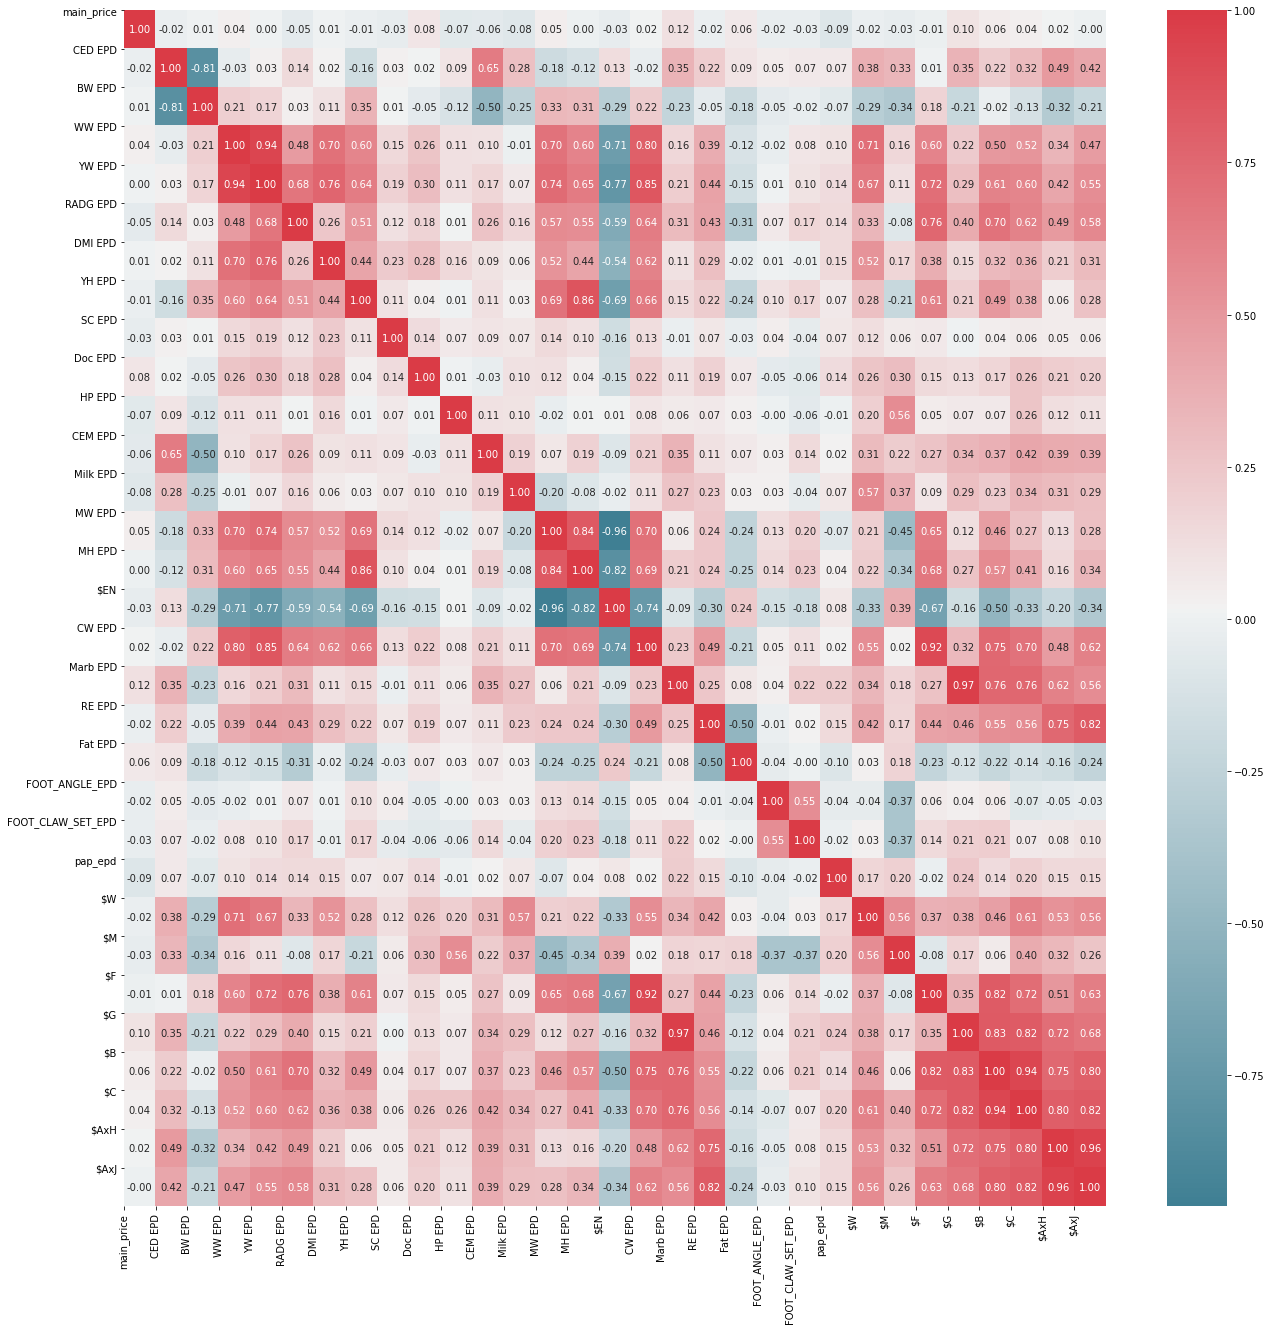

In [11]:
heatMap(df_reduced)

In [12]:
df_reduced.corr(method="pearson")['main_price'].sort_values(ascending=False)

main_price           1.000000
Marb EPD             0.115485
$G                   0.098901
Doc EPD              0.081440
Fat EPD              0.063871
$B                   0.055367
MW EPD               0.047434
$C                   0.038806
WW EPD               0.035542
$AxH                 0.016800
CW EPD               0.016096
DMI EPD              0.008357
BW EPD               0.005701
YW EPD               0.003687
MH EPD               0.000998
$AxJ                -0.001418
$F                  -0.010329
YH EPD              -0.014987
CED EPD             -0.018405
$W                  -0.018495
RE EPD              -0.018995
FOOT_ANGLE_EPD      -0.021355
FOOT_CLAW_SET_EPD   -0.027004
SC EPD              -0.029359
$EN                 -0.031162
$M                  -0.034717
RADG EPD            -0.050348
CEM EPD             -0.055503
HP EPD              -0.066347
Milk EPD            -0.080994
pap_epd             -0.086937
Name: main_price, dtype: float64

In [13]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

In [14]:
cols=list(df_reduced.columns)


In [15]:
cols=list(df_reduced.columns)
df_normalized, dict_values=standarize(df_reduced,cols)
dict_values

{'$AxH': {'max': 252.0,
  'mean': 129.60506329113923,
  'min': -127.0,
  'std': 65.06104883738699},
 '$AxJ': {'max': 270.0,
  'mean': 125.56962025316456,
  'min': -107.0,
  'std': 69.66352845324398},
 '$B': {'max': 247.0,
  'mean': 163.75696202531645,
  'min': 69.0,
  'std': 33.78172201082002},
 '$C': {'max': 381.0,
  'mean': 276.1240506329114,
  'min': 142.0,
  'std': 47.696505674959994},
 '$EN': {'max': 14.0,
  'mean': -30.526582278481012,
  'min': -66.0,
  'std': 13.336952110172149},
 '$F': {'max': 166.0,
  'mean': 106.09113924050632,
  'min': 41.0,
  'std': 20.302829126164863},
 '$G': {'max': 130.0,
  'mean': 57.640506329113926,
  'min': 12.0,
  'std': 20.73282739335559},
 '$M': {'max': 112.0,
  'mean': 63.72658227848101,
  'min': 11.0,
  'std': 16.523055027039906},
 '$W': {'max': 118.0,
  'mean': 77.79240506329114,
  'min': 24.0,
  'std': 14.558387365300703},
 'BW EPD': {'max': 7.5,
  'mean': 1.3716455696202519,
  'min': -3.1,
  'std': 1.673109532749736},
 'CED EPD': {'max': 18.0,

Text(0.5, 1.0, 'Distribution of Main Price')

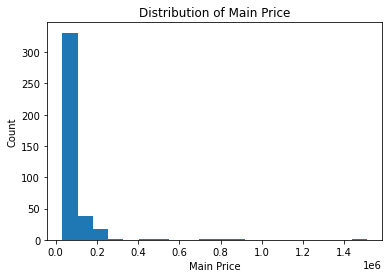

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [17]:
k=df_reduced['main_price'].kurtosis()
s=df_reduced['main_price'].skew()

print(f'Kurtosis : {k}, Skew : {s}' )

Kurtosis : 79.27478738753878, Skew : 7.753395841691451


In [18]:
df_reduced['main_price'].describe()

count    3.950000e+02
mean     8.547848e+04
std      1.122997e+05
min      3.250000e+04
25%      4.500000e+04
50%      5.500000e+04
75%      8.300000e+04
max      1.510000e+06
Name: main_price, dtype: float64

In [19]:
d975=df_reduced['main_price'].quantile(q=0.975)
d975


250000.0

In [20]:
df_reduced_975=df_reduced[df_reduced.main_price <=d975   ]

Text(0.5, 1.0, 'Distribution of Main Price')

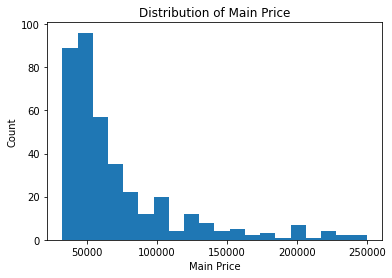

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced_975['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [22]:
df_reduced_975.corr(method="pearson")['main_price'].sort_values(ascending=False)

main_price           1.000000
MW EPD               0.117925
Marb EPD             0.115686
$G                   0.104004
$B                   0.103487
MH EPD               0.103064
WW EPD               0.097342
YW EPD               0.090713
Doc EPD              0.084544
$C                   0.082091
CW EPD               0.076152
RADG EPD             0.071732
$F                   0.066659
YH EPD               0.059803
Fat EPD              0.031624
DMI EPD              0.031168
$AxJ                 0.025449
$W                   0.023230
$AxH                 0.020978
RE EPD              -0.007797
BW EPD              -0.009439
HP EPD              -0.019257
FOOT_ANGLE_EPD      -0.021267
SC EPD              -0.030807
$M                  -0.034674
CED EPD             -0.035972
pap_epd             -0.042723
CEM EPD             -0.051575
FOOT_CLAW_SET_EPD   -0.059283
Milk EPD            -0.069819
$EN                 -0.115792
Name: main_price, dtype: float64

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [24]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [25]:
labels=df_normalized['main_price'] 

In [26]:
X =df_normalized[['CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ']]

In [27]:
# Firs Try with all features

In [28]:
df_normalized.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [29]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized, labels, 
                                                   
                                                    test_size = 0.25,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(296, 31)
(99, 31)


In [30]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    r2 = r2_score(true,predictions)
    
    return mae, rmse, r2

Naive Baseline

In [31]:
# Naive baseline is the median
median_pred = X_train['main_price'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

In [32]:
# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 0.3033
Median Baseline RMSE: 0.7610
Median Baseline R2: -0.0439


In [33]:
df_normalized.main_price.describe()

count    3.950000e+02
mean    -1.495288e-16
std      1.000000e+00
min     -4.717597e-01
25%     -3.604504e-01
50%     -2.714030e-01
75%     -2.207023e-02
max      1.268500e+01
Name: main_price, dtype: float64

In [34]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='main_price')
    X_test = X_test.drop(columns='main_price')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test,predictions)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_baseline
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
    
    return results

In [35]:
results = evaluate(X_train, X_test, y_train, y_test)

In [36]:
results # what we can infer from the metrics is that there is not correleation at all with the predicted value

,mae,rmse,r2
Linear Regression,0.505654,0.824677,-0.225928
ElasticNet Regression,0.400592,0.7508,-0.0161209
Random Forest,0.595937,1.25246,-1.82763
Extra Trees,0.478513,0.821306,-0.215924
SVM,0.333892,0.760155,-0.0416016
Gradient Boosted,0.54073,1.18561,-1.53386
Baseline,0.303256,0.760984,-0.0438751


In [37]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

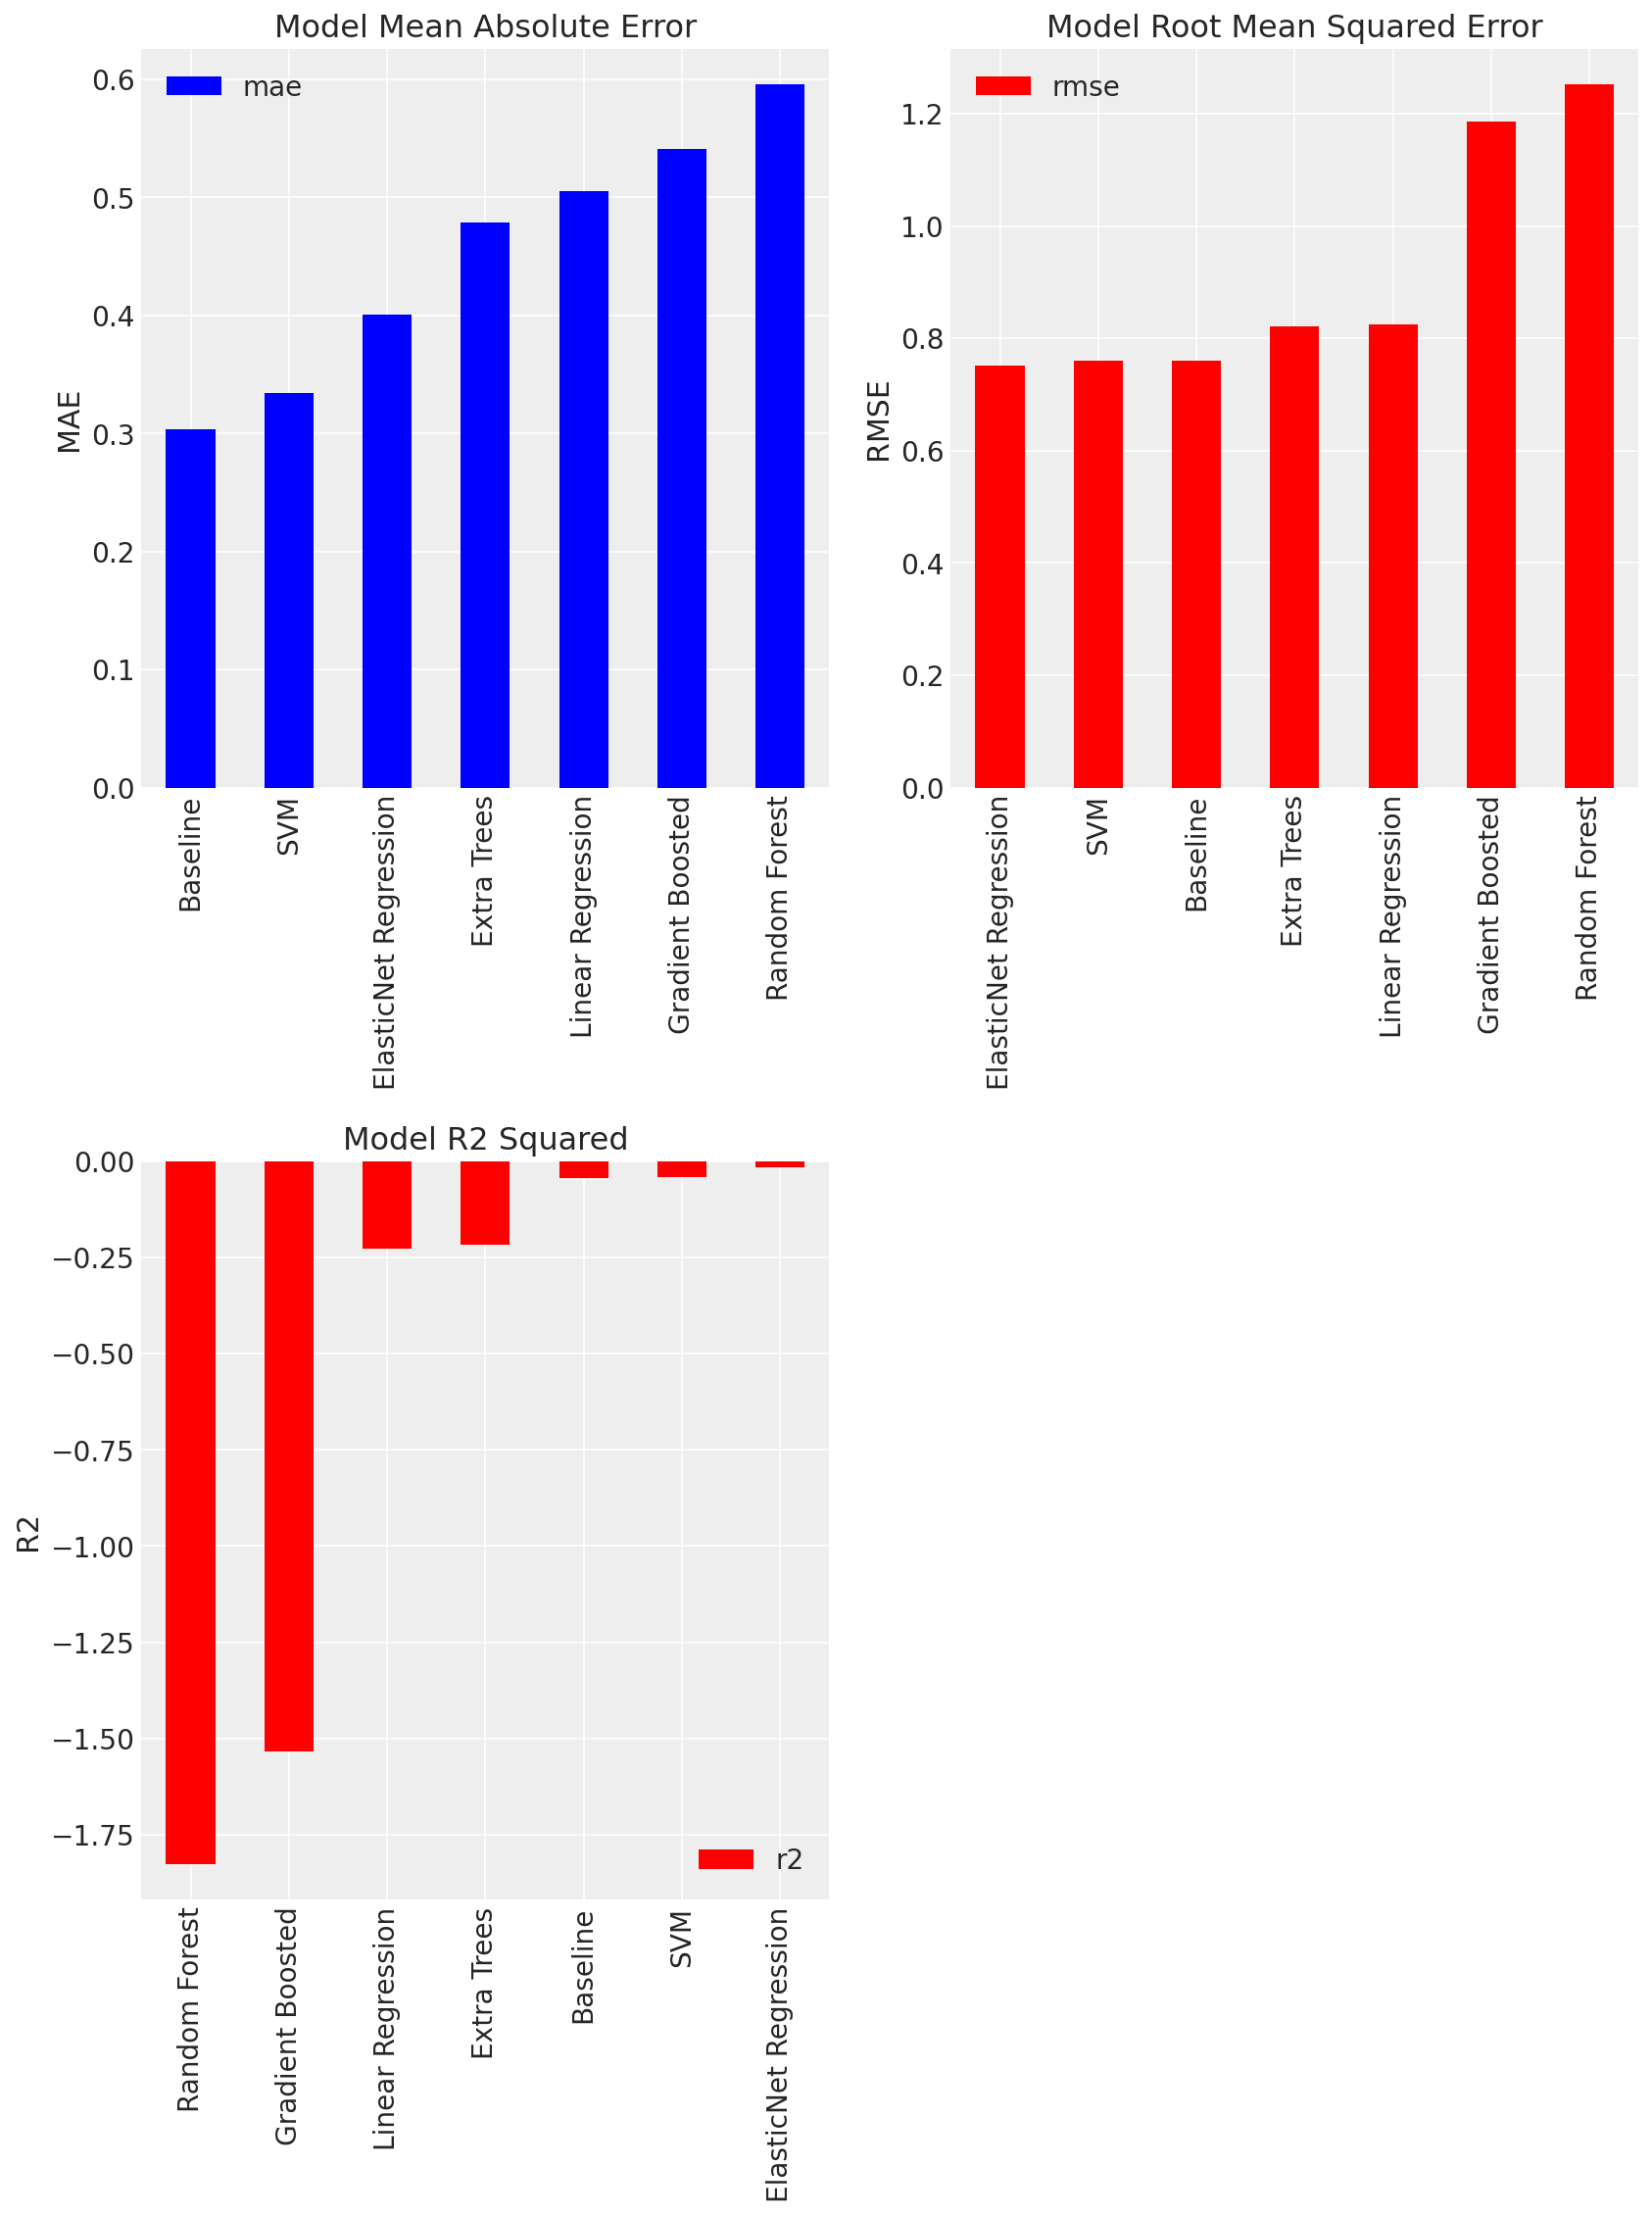

In [38]:
plt.figure(figsize=(12, 16))
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(2, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(2, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

# R2 Score
ax = plt.subplot(2, 2, 3)
results.sort_values('r2', ascending = True).plot.bar(y = 'r2', color = 'r', ax = ax)
plt.title('Model R2 Squared'); plt.ylabel('R2');
plt.tight_layout()

OLS Regression

In [39]:
# here I am simply going to write the function which describe the Target Variable main_price  in terms of the imput
# parameters. Here I am doing the assuption that a Linear Regression can explain the model
# we will see , the intercept and coeficient of each input parameter on the formula
lr = LinearRegression()
lr.fit(X_train.drop(columns='main_price'), y_train)

ols_formula = 'main_price = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.drop(columns='main_price')):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'main_price = 0.02 + -0.06 * CED_EPD + -0.69 * BW_EPD + 1.83 * WW_EPD + -0.77 * YW_EPD + -0.02 * RADG_EPD + -0.03 * DMI_EPD + 0.06 * YH_EPD + 0.03 * SC_EPD + -0.25 * Doc_EPD + -0.67 * HP_EPD + -0.30 * CEM_EPD + 0.72 * Milk_EPD + 0.52 * MW_EPD + -0.07 * MH_EPD + -0.32 * EN + 0.20 * CW_EPD + -8.91 * Marb_EPD + -1.46 * RE_EPD + 1.15 * Fat_EPD + 0.23 * FOOT_ANGLE_EPD + 0.14 * FOOT_CLAW_SET_EPD + -0.18 * pap_epd + -2.23 * W + 3.09 * M + -8.83 * F + 1.04 * G + 18.62 * B + -4.61 * C + 0.18 * AxH + -0.35 * AxJ'

In [40]:
formula="main_price = 0.02 + -0.06 * CED_EPD + -0.69 * BW_EPD + 1.83 * WW_EPD + -0.77 * YW_EPD + -0.02 * RADG_EPD + -0.03 * DMI_EPD + 0.06 * YH_EPD + 0.03 * SC_EPD + -0.25 * Doc_EPD + -0.67 * HP_EPD + -0.30 * CEM_EPD + 0.72 * Milk_EPD + 0.52 * MW_EPD + -0.07 * MH_EPD + -0.32 * EN + 0.20 * CW_EPD + -8.91 * Marb_EPD + -1.46 * RE_EPD + 1.15 * Fat_EPD + 0.23 * FOOT_ANGLE_EPD + 0.14 * FOOT_CLAW_SET_EPD + -0.18 * pap_epd + -2.23 * W + 3.09 * M + -8.83 * F + 1.04 * G + 18.62 * B + -4.61 * C + 0.18 * AxH + -0.35 * AxJ"

Bayesian Linear Regression

In [41]:
# Now I will use a probabilystic model and rather to predict single values as estimation for our target variable, i will provide
# a probability distribution which will explain the target variable based on my believe of how the model can be represented
# and the observed data in our input dataset

# Formula for Bayesian Linear Regression (follows R formula syntax)

formula = 'main_price ~ ' + ' + '.join(['%s' % variable for variable in X_train.drop(columns='main_price').columns])
formula

'main_price ~ CED_EPD + BW_EPD + WW_EPD + YW_EPD + RADG_EPD + DMI_EPD + YH_EPD + SC_EPD + Doc_EPD + HP_EPD + CEM_EPD + Milk_EPD + MW_EPD + MH_EPD + EN + CW_EPD + Marb_EPD + RE_EPD + Fat_EPD + FOOT_ANGLE_EPD + FOOT_CLAW_SET_EPD + pap_epd + W + M + F + G + B + C + AxH + AxJ'

In [42]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution, for simplicity
    family = pm.glm.families.Normal() 
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500,return_inferencedata=True)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, AxJ, AxH, C, B, G, F, M, W, pap_epd, FOOT_CLAW_SET_EPD, FOOT_ANGLE_EPD, Fat_EPD, RE_EPD, Marb_EPD, CW_EPD, EN, MH_EPD, MW_EPD, Milk_EPD, CEM_EPD, HP_EPD, Doc_EPD, SC_EPD, YH_EPD, DMI_EPD, RADG_EPD, YW_EPD, WW_EPD, BW_EPD, CED_EPD, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1279 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


In [43]:
normal_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

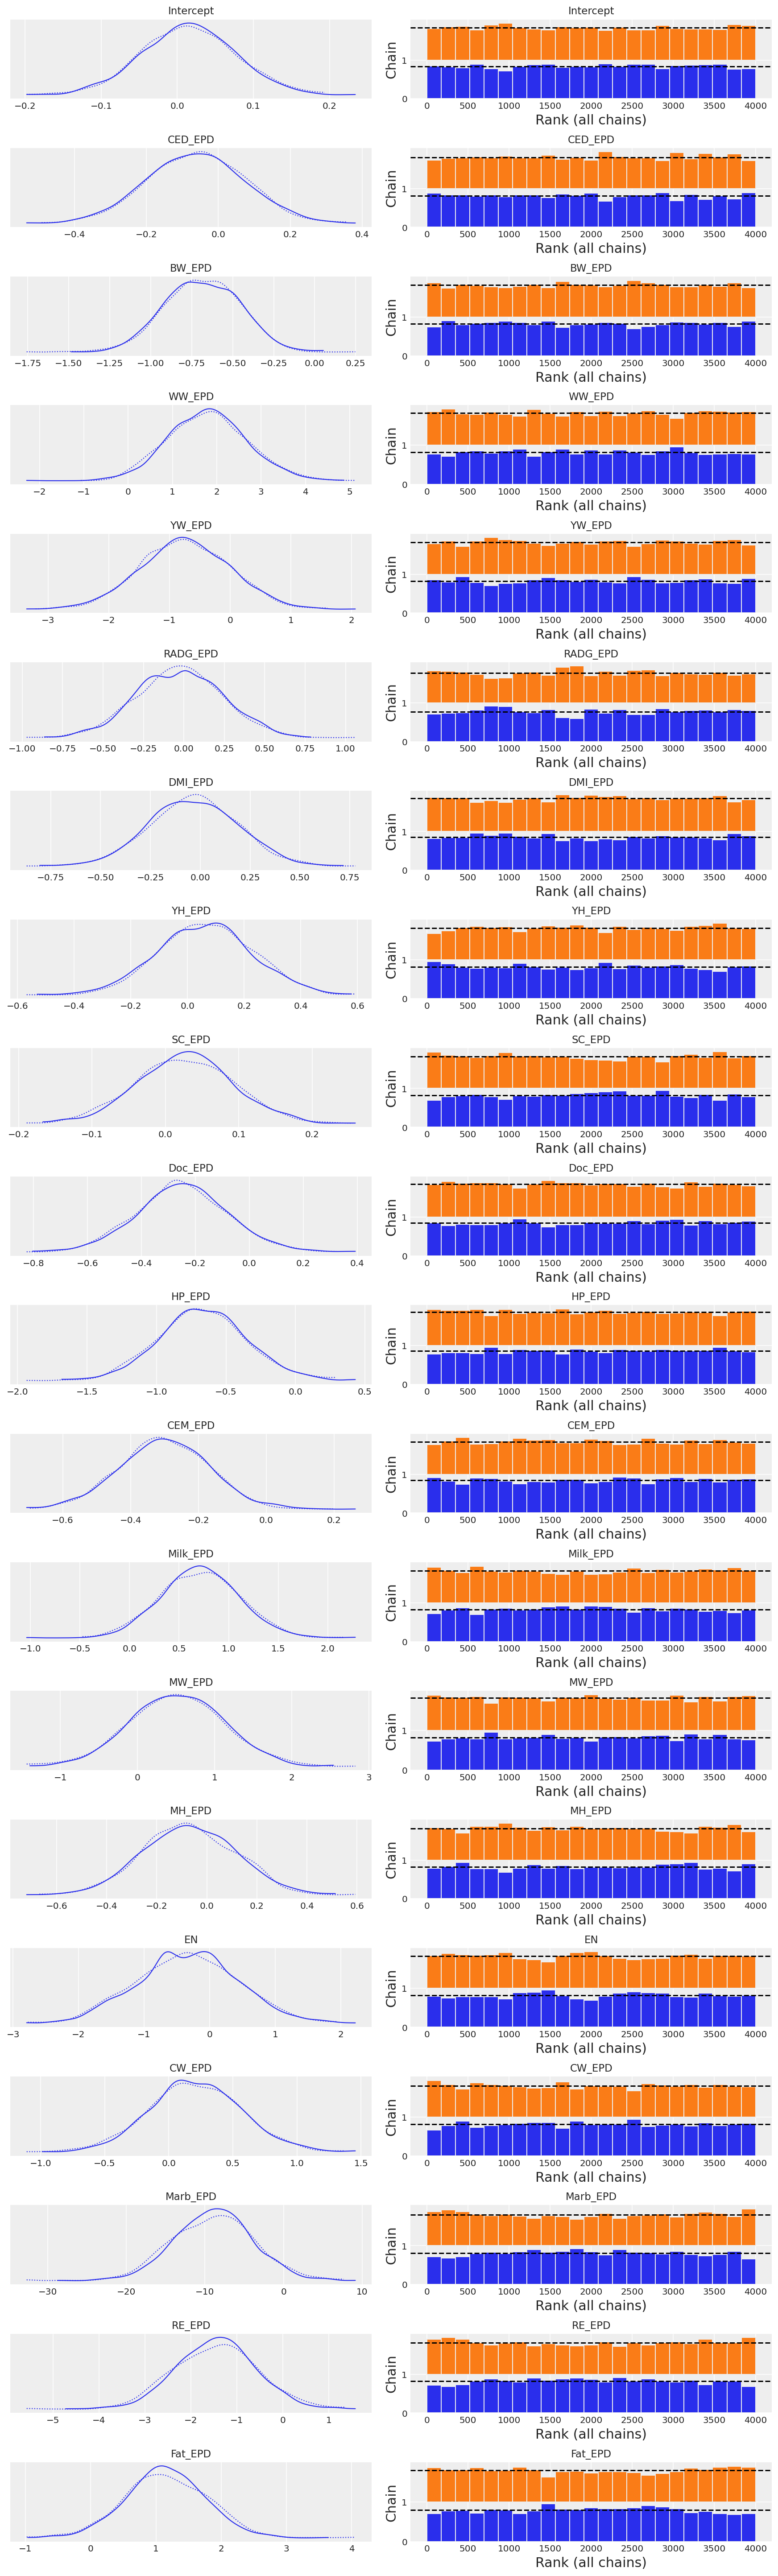

In [44]:
with normal_model:
    az.plot_trace(normal_trace, compact=True,kind="rank_bars");

In [45]:
df_reduced.corr(method="pearson")['main_price'].sort_values(ascending=False)

main_price           1.000000
Marb EPD             0.115485
$G                   0.098901
Doc EPD              0.081440
Fat EPD              0.063871
$B                   0.055367
MW EPD               0.047434
$C                   0.038806
WW EPD               0.035542
$AxH                 0.016800
CW EPD               0.016096
DMI EPD              0.008357
BW EPD               0.005701
YW EPD               0.003687
MH EPD               0.000998
$AxJ                -0.001418
$F                  -0.010329
YH EPD              -0.014987
CED EPD             -0.018405
$W                  -0.018495
RE EPD              -0.018995
FOOT_ANGLE_EPD      -0.021355
FOOT_CLAW_SET_EPD   -0.027004
SC EPD              -0.029359
$EN                 -0.031162
$M                  -0.034717
RADG EPD            -0.050348
CEM EPD             -0.055503
HP EPD              -0.066347
Milk EPD            -0.080994
pap_epd             -0.086937
Name: main_price, dtype: float64

In [46]:
df_reduced1=df_reduced[['main_price', 'Marb EPD', '$G', 'Doc EPD', 'Fat EPD', 'pap_epd' , 'Milk EPD', 'HP EPD', 'CEM EPD']]
df_reduced1.columns         

Index(['main_price', 'Marb EPD', '$G', 'Doc EPD', 'Fat EPD', 'pap_epd',
       'Milk EPD', 'HP EPD', 'CEM EPD'],
      dtype='object')

In [47]:
df_reduced1.columns=['main_price', 'Marb_EPD', 'G', 'Doc_EPD', 'Fat_EPD', 'pap_epd',
       'Milk_EPD', 'HP_EPD', 'CEM_EPD']

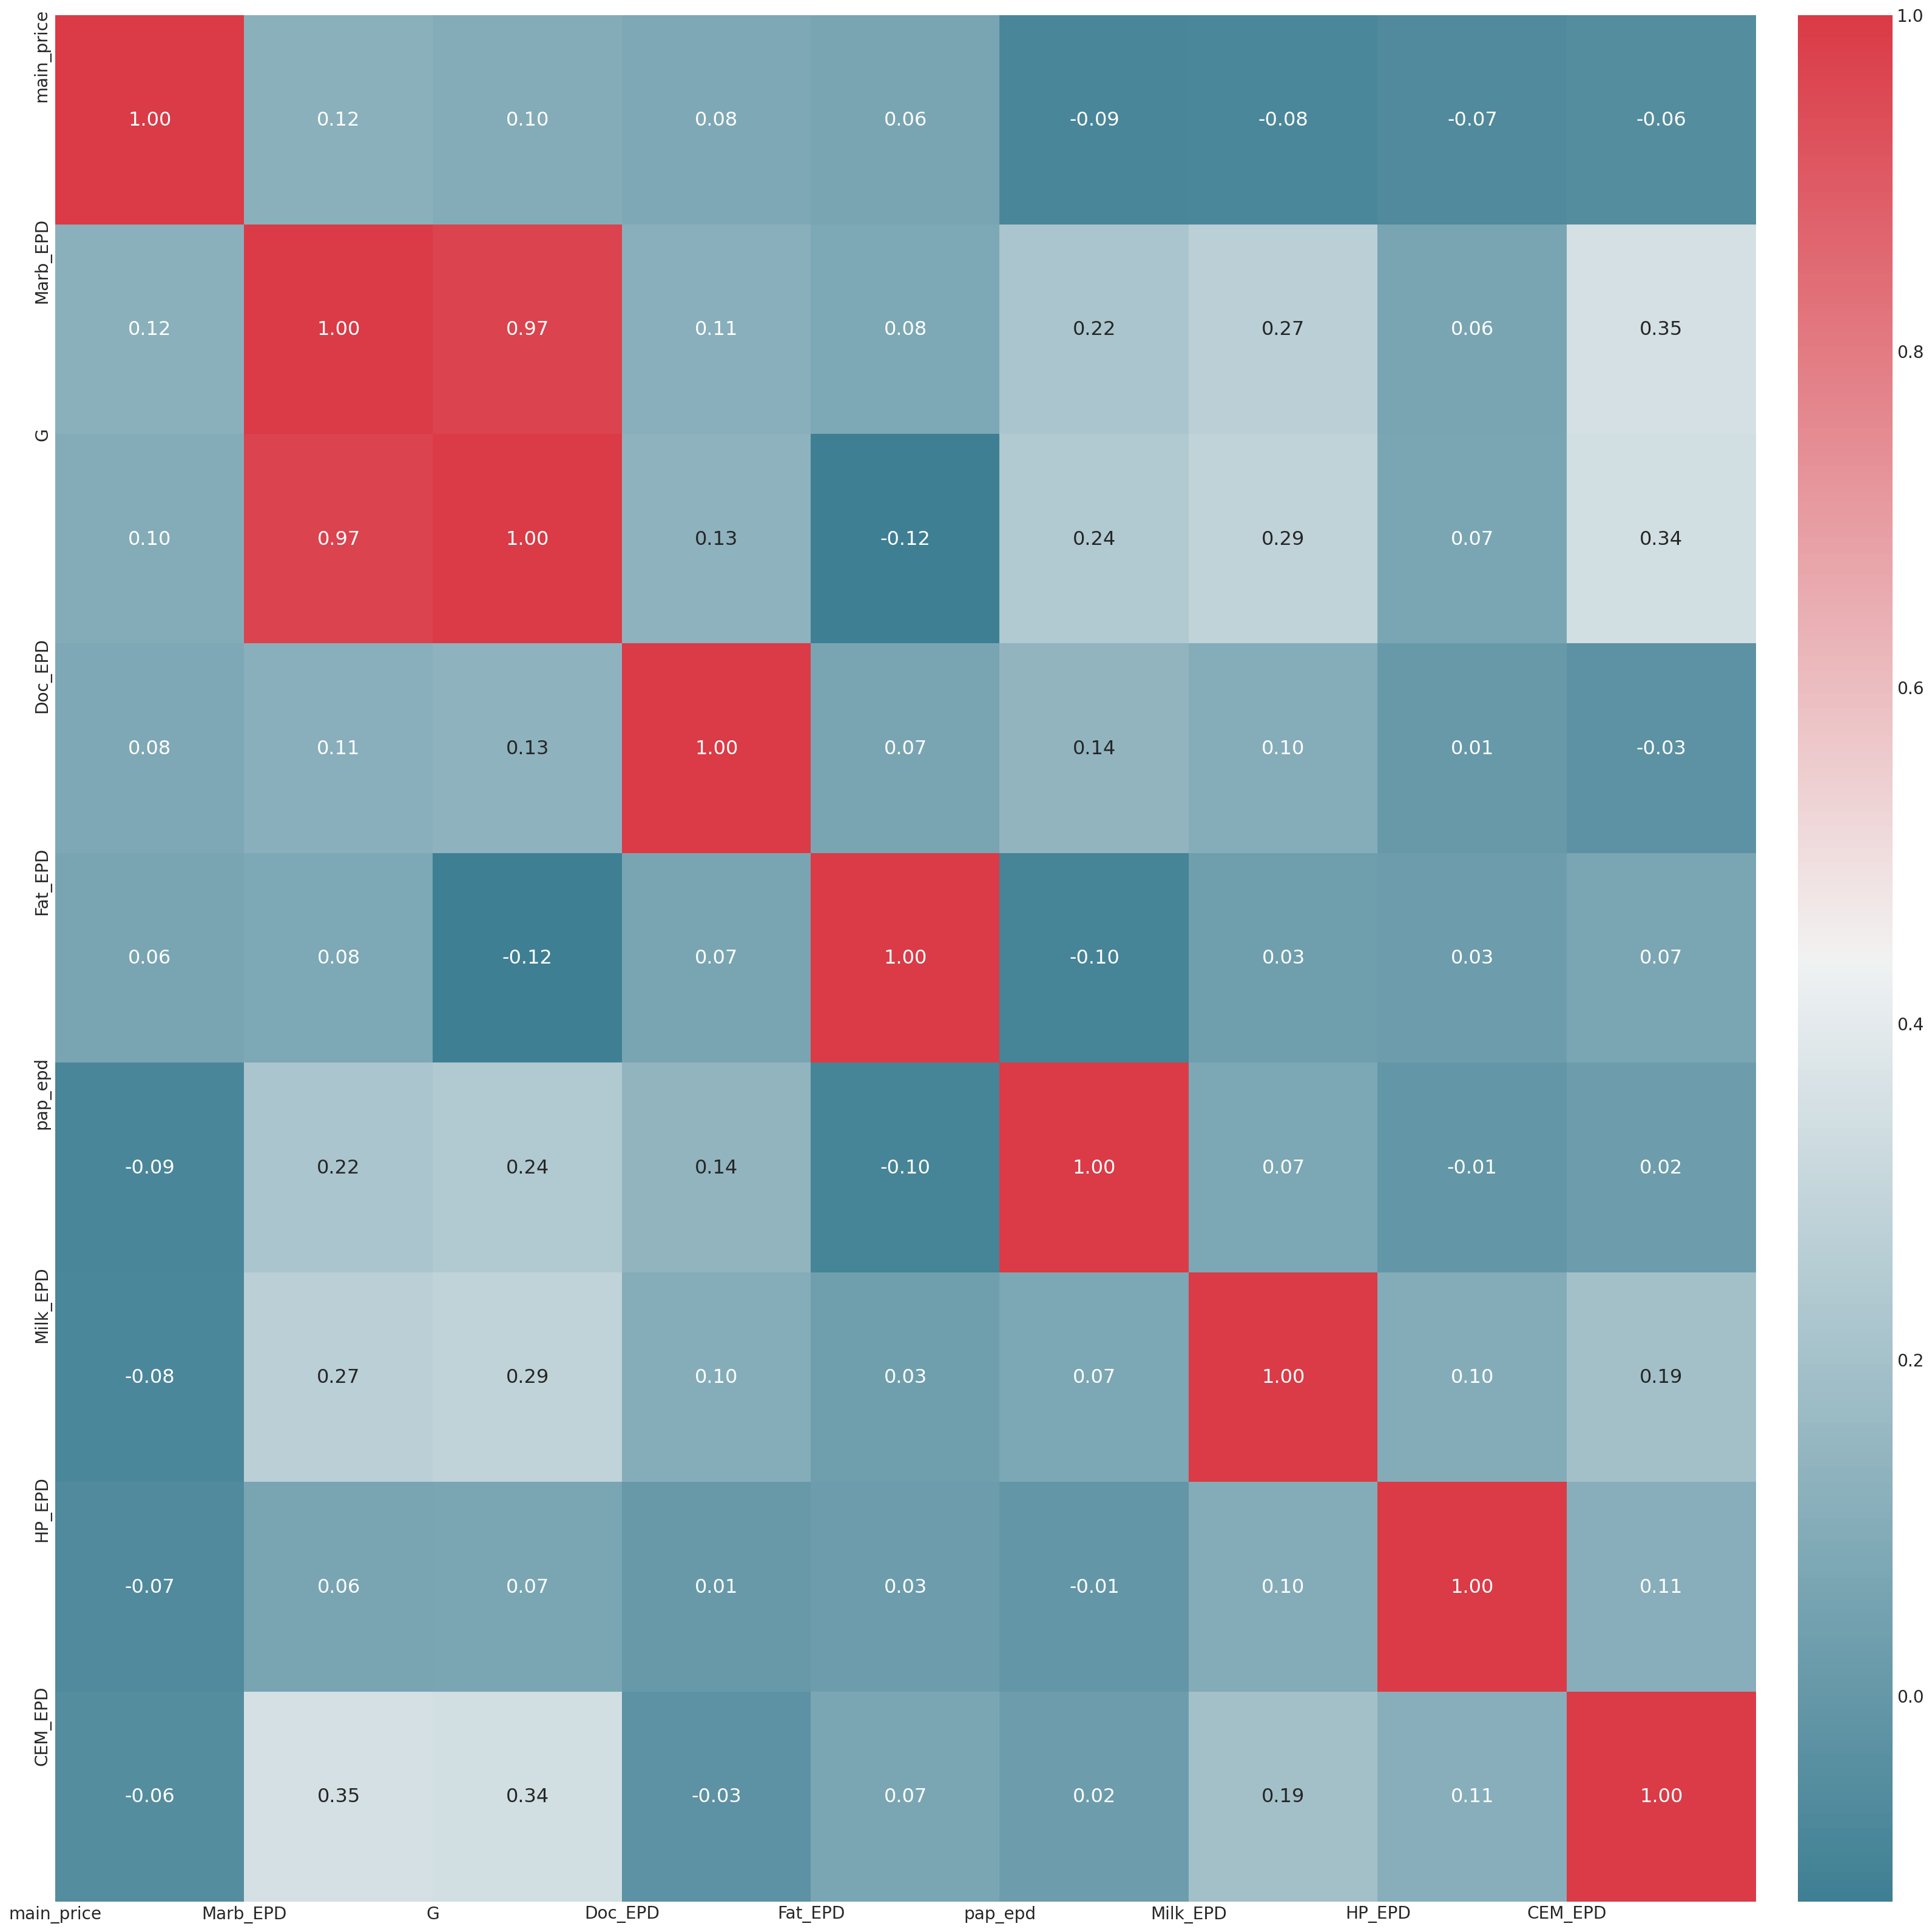

In [48]:
heatMap(df_reduced1)

In [49]:
cols=list(df_reduced1.columns)
df_normalized1, dict_values=standarize(df_reduced1,cols)
dict_values

{'CEM_EPD': {'max': 18.0,
  'mean': 9.336708860759494,
  'min': -7.0,
  'std': 4.436299768768233},
 'Doc_EPD': {'max': 39.0,
  'mean': 22.660759493670888,
  'min': -14.0,
  'std': 7.71453598160985},
 'Fat_EPD': {'max': 0.084,
  'mean': 0.009488607594936704,
  'min': -0.087,
  'std': 0.029065596158275888},
 'G': {'max': 130.0,
  'mean': 57.640506329113926,
  'min': 12.0,
  'std': 20.73282739335559},
 'HP_EPD': {'max': 20.0,
  'mean': 11.72151898734178,
  'min': 4.0,
  'std': 2.9835024764398694},
 'Marb_EPD': {'max': 2.21,
  'mean': 0.7153924050632909,
  'min': -0.26,
  'std': 0.4227526853103293},
 'Milk_EPD': {'max': 45.0,
  'mean': 26.134177215189872,
  'min': 8.0,
  'std': 5.997437821717522},
 'main_price': {'max': 1510000,
  'mean': 85478.48101265823,
  'min': 32500,
  'std': 112299.72660995927},
 'pap_epd': {'max': 7.53,
  'mean': 1.354886075949367,
  'min': -3.13,
  'std': 1.5795161421566877}}

In [50]:
labels=df_normalized['main_price'] 
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized1, labels, 
                                                   
                                                    test_size = 0.25,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(296, 9)
(99, 9)


In [51]:
# Naive baseline is the median
median_pred = X_train['main_price'].mean()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

In [52]:
# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 0.4006
Median Baseline RMSE: 0.7508
Median Baseline R2: -0.0161


In [53]:
resultsr = evaluate(X_train, X_test, y_train, y_test)
resultsr

,mae,rmse,r2
Linear Regression,0.447514,0.772031,-0.0743998
ElasticNet Regression,0.400592,0.7508,-0.0161209
Random Forest,0.546366,1.21838,-1.67586
Extra Trees,0.50273,0.914479,-0.507455
SVM,0.331919,0.733237,0.0308615
Gradient Boosted,0.636215,1.51331,-3.12814
Baseline,0.303256,0.760984,-0.0161209


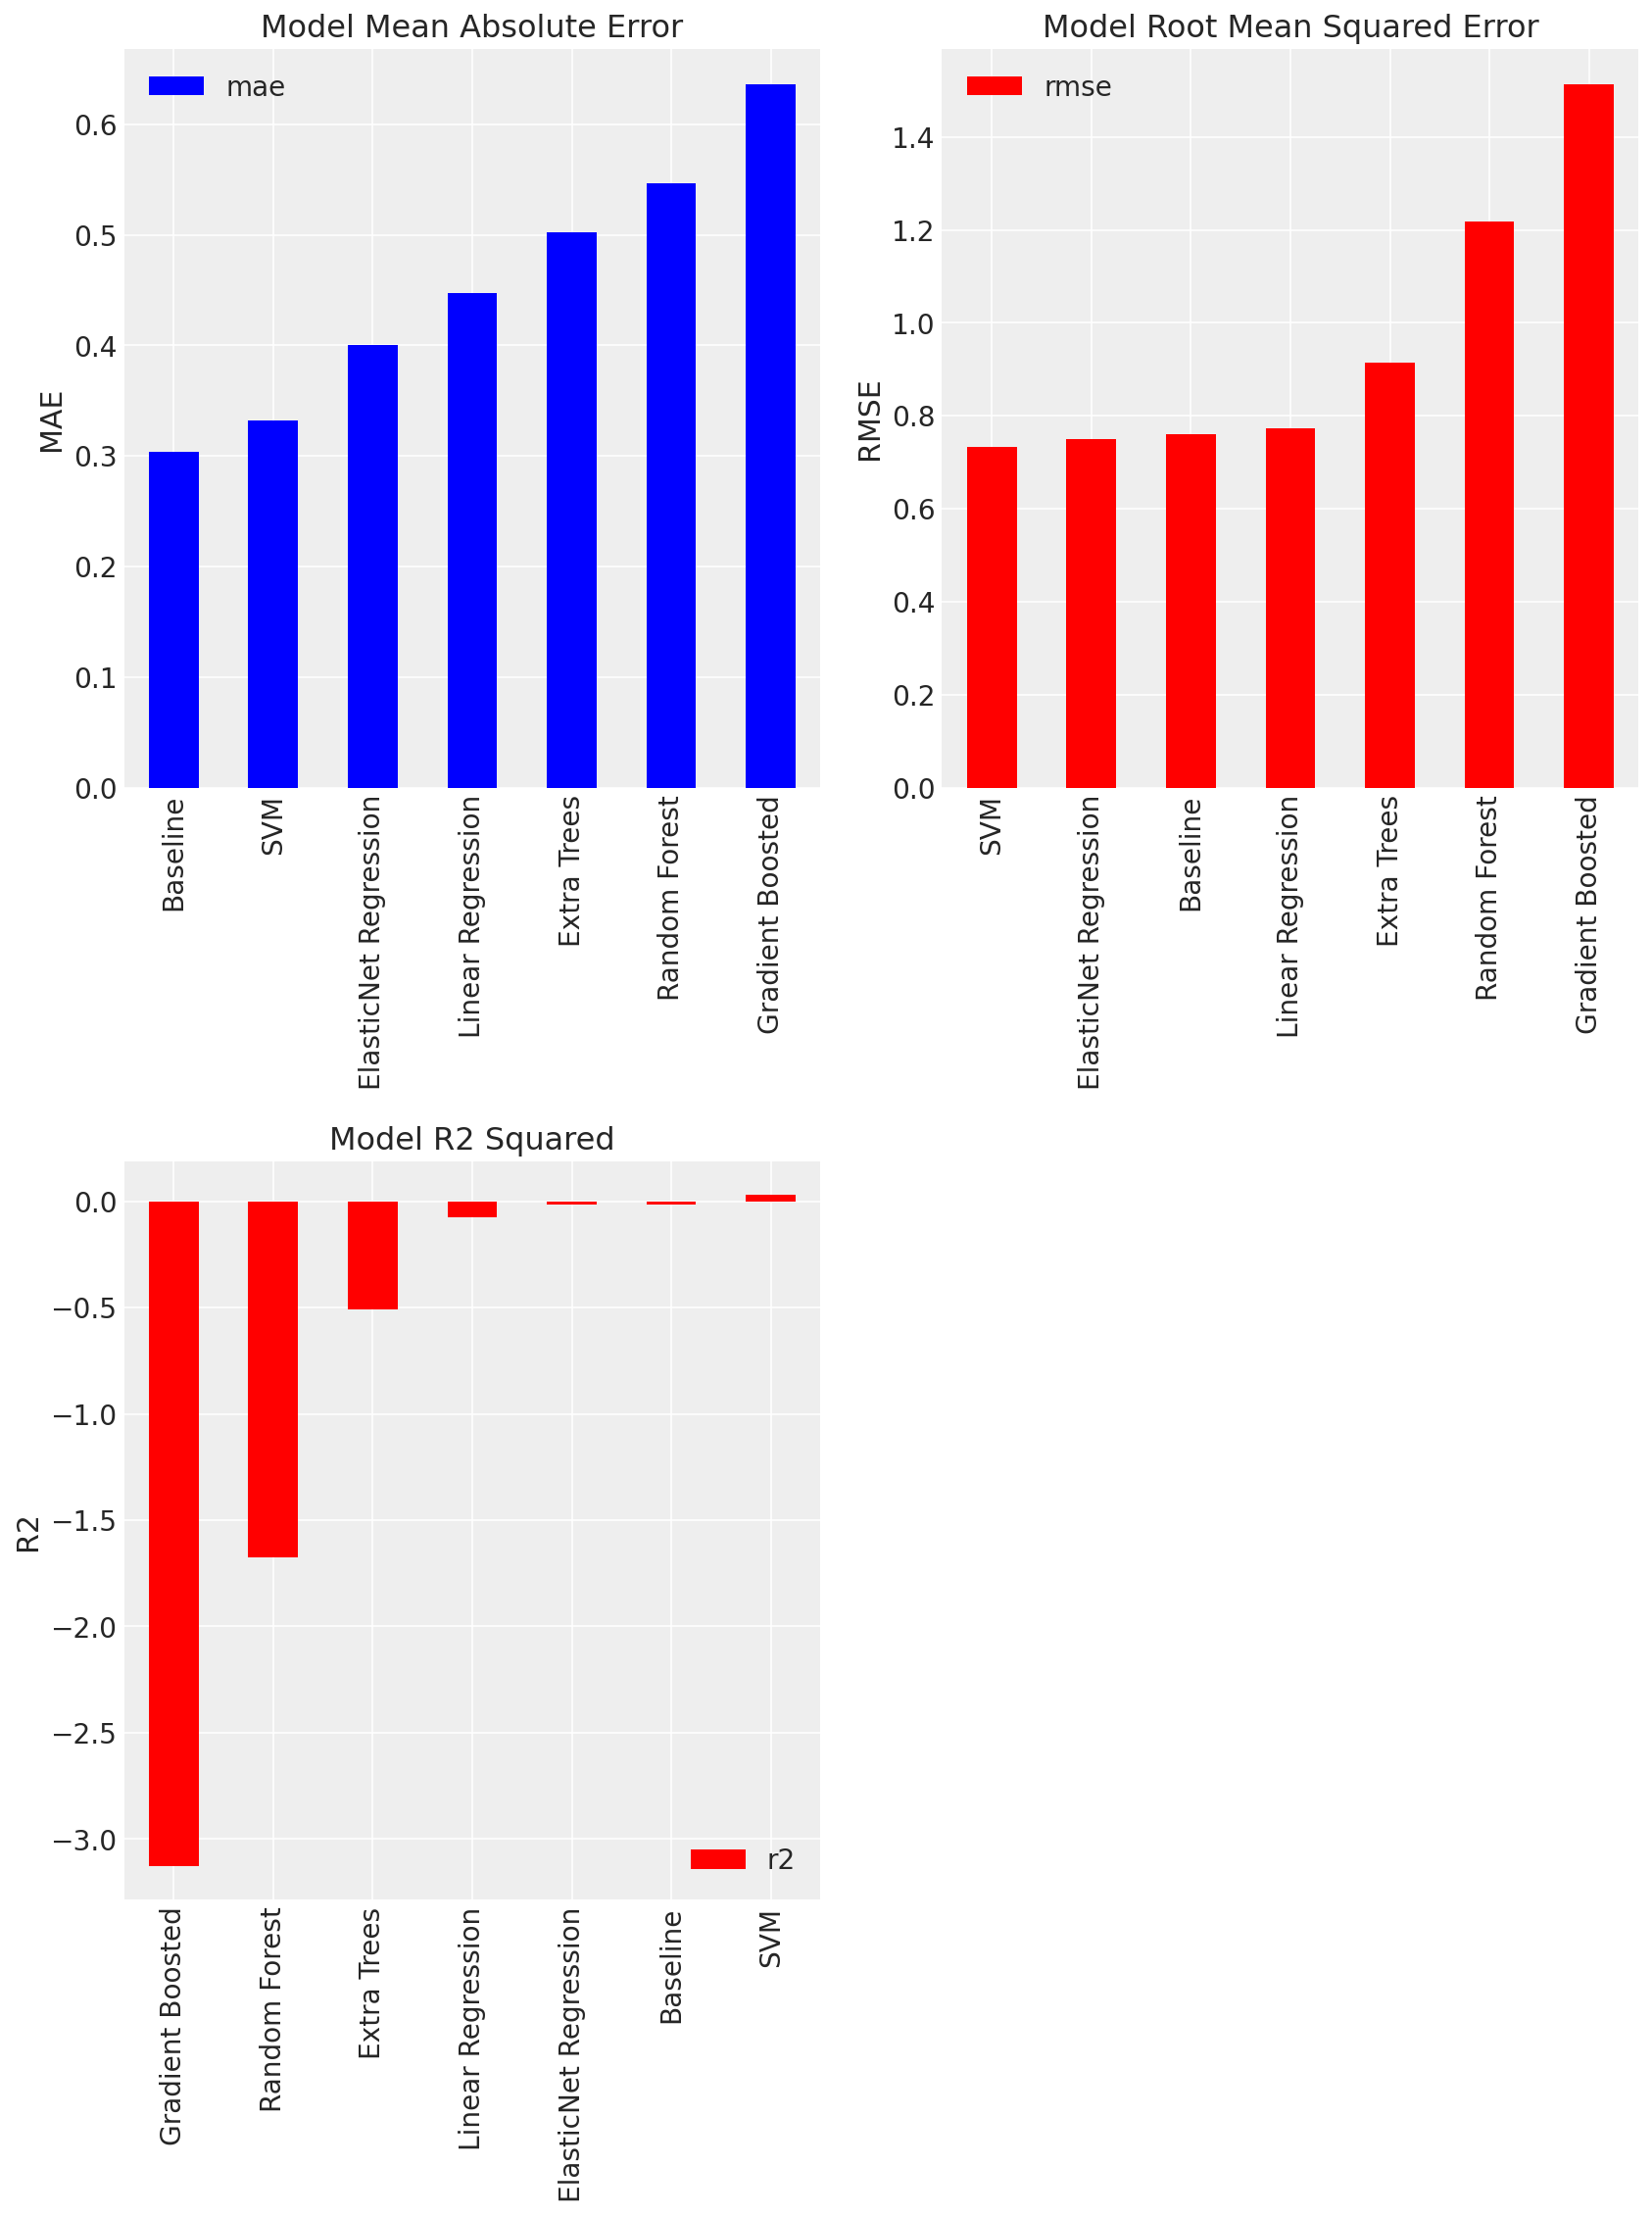

In [54]:
plt.figure(figsize=(12, 16))
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(2, 2, 1)
resultsr.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(2, 2, 2)
resultsr.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

# R2 Score
ax = plt.subplot(2, 2, 3)
resultsr.sort_values('r2', ascending = True).plot.bar(y = 'r2', color = 'r', ax = ax)
plt.title('Model R2 Squared'); plt.ylabel('R2');
plt.tight_layout()

In [55]:
# here I am simply going to write the function which describe the Target Variable main_price  in terms of the imput
# parameters. Here I am doing the assuption that a Linear Regression can explain the model
# we will see , the intercept and coeficient of each input parameter on the formula
lr = LinearRegression()
lr.fit(X_train.drop(columns='main_price'), y_train)

ols_formula = 'main_price = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.drop(columns='main_price')):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'main_price = 0.01 + 0.05 * Marb_EPD + 0.22 * G + 0.07 * Doc_EPD + 0.07 * Fat_EPD + -0.18 * pap_epd + -0.10 * Milk_EPD + -0.05 * HP_EPD + -0.14 * CEM_EPD'

In [56]:
# Now I will use a probabilystic model and rather to predict single values as estimation for our target variable, i will provide
# a probability distribution which will explain the target variable based on my believe of how the model can be represented
# and the observed data in our input dataset

# Formula for Bayesian Linear Regression (follows R formula syntax)

formula = 'main_price ~ ' + ' + '.join(['%s' % variable for variable in X_train.drop(columns='main_price').columns])
formula

'main_price ~ Marb_EPD + G + Doc_EPD + Fat_EPD + pap_epd + Milk_EPD + HP_EPD + CEM_EPD'

In [57]:
model_lin = sm.OLS.from_formula("main_price ~ Marb_EPD + G + Doc_EPD + Fat_EPD + pap_epd + Milk_EPD + HP_EPD + CEM_EPD", data=df_normalized1)


result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             main_price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.160
Date:                Wed, 02 Jun 2021   Prob (F-statistic):            0.00176
Time:                        05:26:39   Log-Likelihood:                -547.45
No. Observations:                 395   AIC:                             1113.
Df Residuals:                     386   BIC:                             1149.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.031e-17      0.049  -1.02e-15      1.000      -0.097       0.097
Marb_EPD       0.2019      0.382      0.529      0.597      -0.549       0.953
G             -0.0047      0.388     -0.012      0.990      -0.768       0.759
Doc_EPD        0.0829      0.052      1.602      0.110      -0.019       0.185
Fat_EPD        0.0417      0.092      0.451      0.652      -0.140       0.223
pap_epd       -0.1271      0.051     -2.475      0.014      -0.228      -0.026
Milk_EPD      -0.1104      0.053     -2.090      0.037      -0.214      -0.007
HP_EPD        -0.0599      0.050     -1.202      0.230      -0.158       0.038
CEM_EPD       -0.0945      0.053     -1.766      0.078      -0.200       0.011
==============================================================================
Omnibus:                      569.984   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96375.040
Skew:                           7.406   Prob(JB):                         0.00
Kurtosis:                      78.075   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model_glm = sm.GLM.from_formula("main_price ~ Marb_EPD + G + Doc_EPD + Fat_EPD + pap_epd + Milk_EPD + HP_EPD + CEM_EPD", data=df_normalized1)
result_glm = model_glm.fit()
result_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             main_price   No. Observations:                  395
Model:                            GLM   Df Residuals:                      386
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.95798
Method:                          IRLS   Log-Likelihood:                -547.45
Date:                Wed, 02 Jun 2021   Deviance:                       369.78
Time:                        05:26:39   Pearson chi2:                     370.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.725e-17      0.049  -1.16e-15      1.000      -0.097       0.097
Marb_EPD       0.2019      0.382      0.529      0.597      -0.547       0.950
G             -0.0047      0.388     -0.012      0.990      -0.766       0.756
Doc_EPD        0.0829      0.052      1.602      0.109      -0.019       0.184
Fat_EPD        0.0417      0.092      0.451      0.652      -0.139       0.223
pap_epd       -0.1271      0.051     -2.475      0.013      -0.228      -0.026
Milk_EPD      -0.1104      0.053     -2.090      0.037      -0.214      -0.007
HP_EPD        -0.0599      0.050     -1.202      0.229      -0.158       0.038
CEM_EPD       -0.0945      0.053     -1.766      0.077      -0.199       0.010
==============================================================================
"""

In [59]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution, for simplicity
    family = pm.glm.families.Normal() 
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500,return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, CEM_EPD, HP_EPD, Milk_EPD, pap_epd, Fat_EPD, Doc_EPD, G, Marb_EPD, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 28 seconds.


In [60]:
normal_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

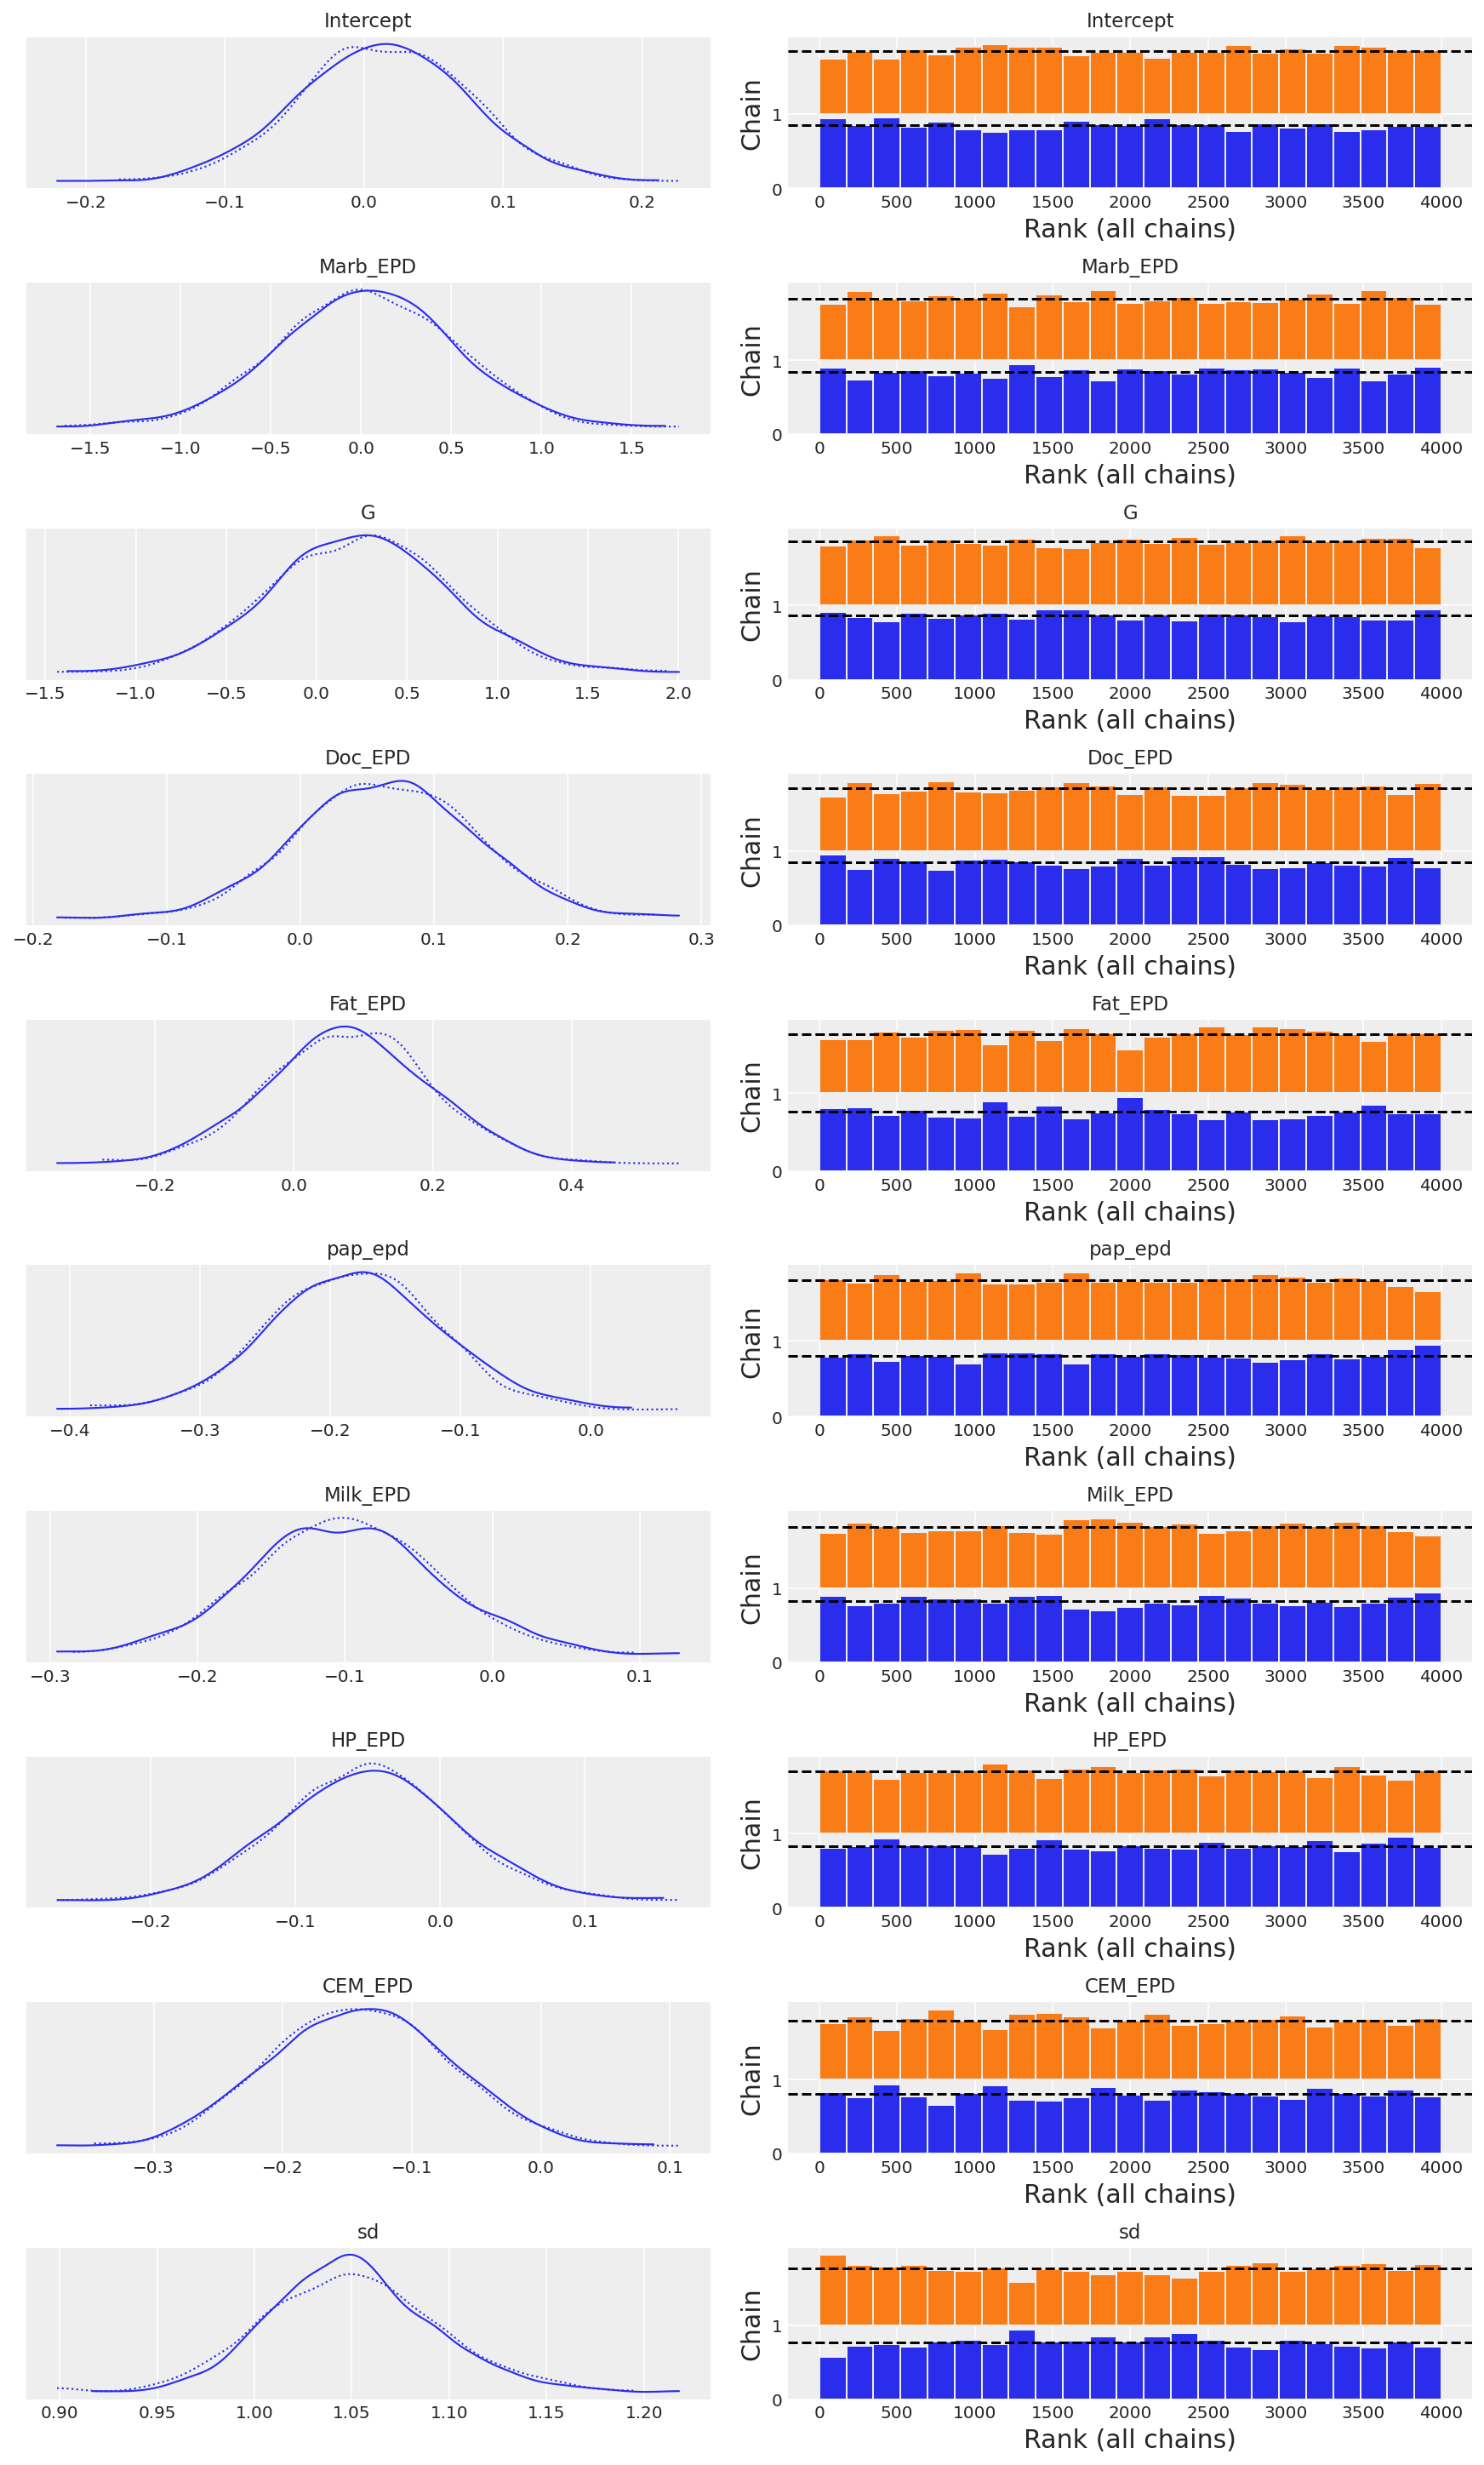

In [61]:
with normal_model:
    az.plot_trace(normal_trace, compact=True,kind="rank_bars");